### t2.small, AWS Marketplace -> Anaconda with Python 3

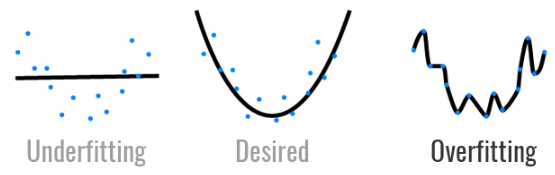

In [1]:
from IPython.display import Image
Image(filename='Overfitting.png')

### 1) L1 Regularization

In [1]:
import numpy as np
from sklearn import metrics
from sklearn import datasets
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

for Alpha in [10, 1, 0.1]:

  predictions = np.round(Lasso(alpha=Alpha).fit(X_train, y_train).predict(X_test))
  print('Accuracy: {:.{}f}'.format(metrics.accuracy_score(y_test, predictions), 5) + ', Alpha: ' + str(Alpha))

Accuracy: 0.31579, Alpha: 10
Accuracy: 0.31579, Alpha: 1
Accuracy: 0.94737, Alpha: 0.1


### 2) L2 regularization

In [1]:
import numpy as np
from sklearn import metrics
from sklearn import datasets
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

for Alpha in [10, 1, 0.1]:

  predictions = np.round(Ridge(alpha=Alpha).fit(X_train, y_train).predict(X_test))
  print('Accuracy: {:.{}f}'.format(metrics.accuracy_score(y_test, predictions), 5) + ', Alpha: ' + str(Alpha))

Accuracy: 0.97368, Alpha: 10
Accuracy: 0.97368, Alpha: 1
Accuracy: 0.97368, Alpha: 0.1


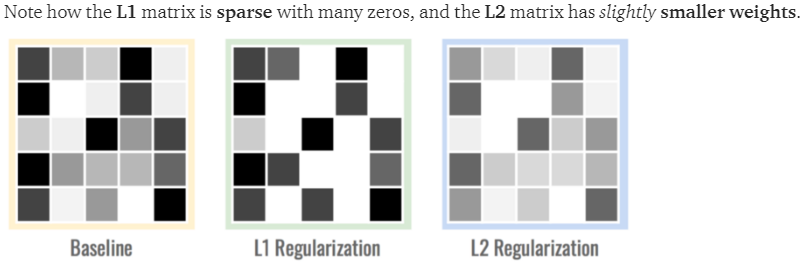

In [1]:
from IPython.display import Image
Image(filename='L1L2Regularization.png')

### 3) Elastic Net

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from sklearn import metrics
from sklearn import datasets
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

for L1Ratio in [0.0, 0.5, 1.0]:

  for Alpha in [10, 1, 0.1]:

    predictions = np.round(ElasticNet(alpha=Alpha, l1_ratio=L1Ratio).fit(X_train, y_train).predict(X_test))
    print('Accuracy: {:.{}f}'.format(metrics.accuracy_score(y_test, predictions), 5)  + ', L1 Ratio: ' + str(L1Ratio) + ', Alpha: ' + str(Alpha))

  print ('-')

Accuracy: 0.36842, L1 Ratio: 0.0, Alpha: 10
Accuracy: 0.97368, L1 Ratio: 0.0, Alpha: 1
Accuracy: 0.94737, L1 Ratio: 0.0, Alpha: 0.1
-
Accuracy: 0.36842, L1 Ratio: 0.5, Alpha: 10
Accuracy: 0.78947, L1 Ratio: 0.5, Alpha: 1
Accuracy: 0.97368, L1 Ratio: 0.5, Alpha: 0.1
-
Accuracy: 0.36842, L1 Ratio: 1.0, Alpha: 10
Accuracy: 0.36842, L1 Ratio: 1.0, Alpha: 1
Accuracy: 0.97368, L1 Ratio: 1.0, Alpha: 0.1
-


### 4) Ensemble Methods

In [1]:
from sklearn import metrics
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

predictions = RandomForestClassifier(n_estimators=100).fit(X_train, y_train).predict(X_test)

print('Accuracy: {:.{}f}'.format(metrics.accuracy_score(y_test, predictions), 5))

Accuracy: 0.94737


### 5) K-fold Cross Validation

In [1]:
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import cross_val_score

iris   = datasets.load_iris()
scores = cross_val_score(svm.SVC(kernel='linear'), iris.data, iris.target, cv=5)

print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std()*2))

Accuracy: 0.98 (+/- 0.03)


### 6) Prune / Reduce Complexity

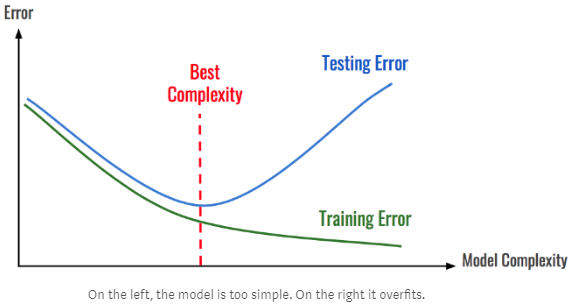

In [4]:
from IPython.display import Image
Image(filename='ParsimonyWins.png')

In [11]:
from sklearn import metrics
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

for Depth in [3,2,1]:

  predictions = DecisionTreeClassifier(max_depth=Depth).fit(X_train, y_train).predict(X_test)
  print('Accuracy: {:.{}f}'.format(metrics.accuracy_score(y_test, predictions), 5) + ', Depth: ' + str(Depth))

Accuracy: 0.92105, Depth: 3
Accuracy: 0.94737, Depth: 2
Accuracy: 0.68421, Depth: 1


### 7) Dropout

Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 2s 68us/step - loss: 0.4204 - acc: 0.8126 - val_loss: 0.3330 - val_acc: 0.8563
Epoch 2/3
25000/25000 [==============================] - 2s 65us/step - loss: 0.3408 - acc: 0.8593 - val_loss: 0.3234 - val_acc: 0.8624
Epoch 3/3
25000/25000 [==============================] - 2s 64us/step - loss: 0.3325 - acc: 0.8626 - val_loss: 0.3269 - val_acc: 0.8617


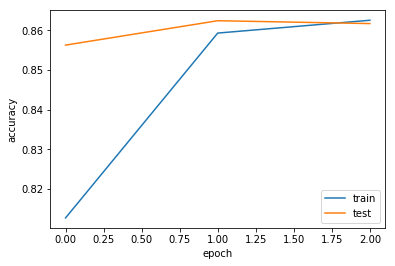

In [2]:
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer

(train_data, train_target), (test_data, test_target) = imdb.load_data()

network = models.Sequential()
network.add(layers.Dense(units=16))
#
network.add(layers.Dropout(0.5))
#
network.add(layers.Dense(units=1, activation='sigmoid'))
network.compile(
                loss      = 'binary_crossentropy',
                optimizer = 'rmsprop'            ,
                metrics   = ['accuracy']
               )
history = network.fit(
                      Tokenizer(num_words=1000).sequences_to_matrix(train_data),
                      train_target                                             ,
                      validation_data = (
                                         Tokenizer(num_words=1000).sequences_to_matrix(test_data), 
                                         test_target
                                        )                                      ,
                      epochs          = 3
                     )

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])

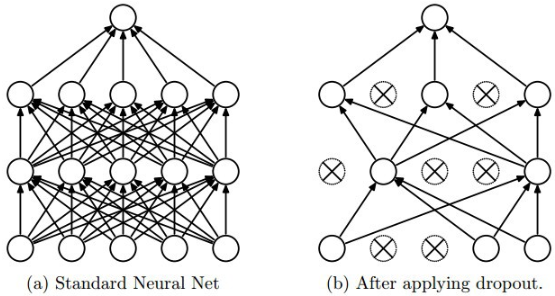

In [2]:
from IPython.display import Image
Image(filename='Dropout.png')

### 8) Remove Features

In [3]:
import numpy as np
from sklearn import metrics
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()

for RemoveFeature in [0,1,2]:

  X_train, X_test, y_train, y_test = train_test_split(np.delete(iris.data, np.s_[:RemoveFeature:1], 1), iris.target)

  predictions = RandomForestClassifier(n_estimators=100).fit(X_train, y_train).predict(X_test)

  print('Accuracy: {:.{}f}'.format(metrics.accuracy_score(y_test, predictions), 5) + ', RemoveFeature: ' + str(RemoveFeature))

Accuracy: 0.92105, RemoveFeature: 0
Accuracy: 0.97368, RemoveFeature: 1
Accuracy: 0.94737, RemoveFeature: 2


### 9) Data Augmentation

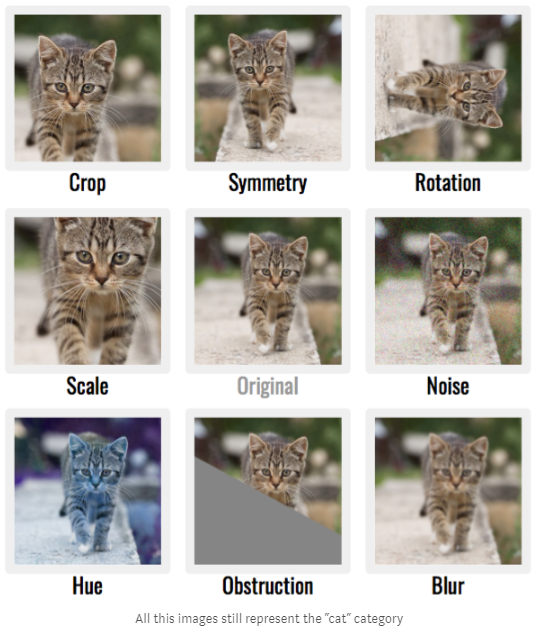

In [1]:
from IPython.display import Image
Image(filename='AugmentedCat.png')

### 10) Increase Dataset Size

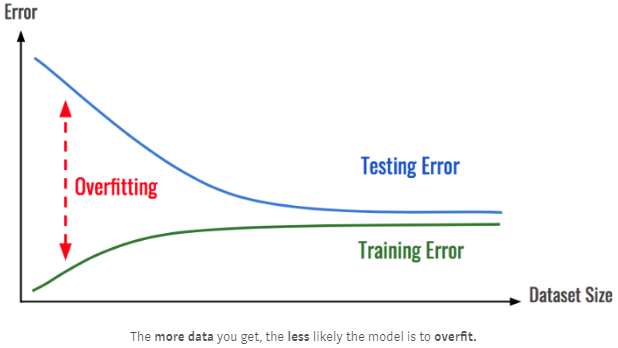

In [2]:
from IPython.display import Image
Image(filename='DataSetSize.png')

### 11) Early Stopping

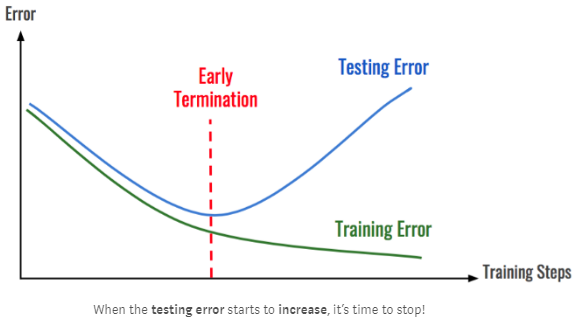

In [3]:
from IPython.display import Image
Image(filename='EarlyStopping.png')

In [1]:
import numpy as np
import xgboost as xgb
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

dtrain      = xgb.DMatrix(X_train, y_train)
bst         = xgb.train({}, dtrain, num_boost_round=10000, evals=[(dtrain, 'train')], early_stopping_rounds=10)
predictions = np.round(bst.predict(xgb.DMatrix(X_test)))

print('Accuracy: {:.{}f}'.format(metrics.accuracy_score(y_test, predictions), 5))

[15:03:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=5
[0]	train-rmse:0.725044
Will train until train-rmse hasn't improved in 10 rounds.
[15:03:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=4
[1]	train-rmse:0.524938
[15:03:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=5
[2]	train-rmse:0.379996
[15:03:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=6
[3]	train-rmse:0.276787
[15:03:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=4
[4]	train-rmse:0.204252
[15:03:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=6
[5]	train-rmse:0.151839
[15:03:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=4
[6]	train-rmse: